In [83]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor


#Evaluation
from sklearn.metrics import mean_squared_error, r2_score

#Misc
from warnings import filterwarnings
filterwarnings('ignore')

### UTILITY FUNCTIONS

In [82]:
def evaluation_matrics(true,predict):
    mae=mean_absolute_error(true,predict)
    mse=mean_squared_error(true,predict)
    rmse=np.sqrt(mse)
    r2_Score=r2_score(true,predict)
    return mae,rmse,r2_Score

In [5]:
# READ DATA
df=pd.read_csv('data\stud.csv')

### Top 5 and bottom 5 rows

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


### PREPARING X AND Y FOR MODELLING

In [11]:
X=df.drop(['math_score'],axis=1)

In [13]:
y=df['math_score']

### PREPARING DATA

In [32]:
#Columns which are numerical and column which are categorical
num_feature=[x for x in X.columns if X[x].dtype!='O']
cat_feature=[x for x in X.columns if X[x].dtype=='O']

In [36]:
numerical_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

In [39]:
preprocessor=ColumnTransformer([
('OneHotEncoder',oh_transformer,cat_feature),
('Standardscaler',numerical_transformer,num_feature)
])

In [40]:
X=preprocessor.fit_transform(X)

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
models={
    'Linear regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [84]:
model_list=[]
r2_list=[]

for i in models.keys():
    model=models[i]
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluation_matrics(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluation_matrics(y_test, y_test_pred)

    print(i)
    model_list.append(i)
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear regression
Model performance for Training set
- Root Mean Squared Error: 5.3402
- Mean Absolute Error: 4.2723
- R2 Score: 0.8735
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4214
- Mean Absolute Error: 4.2253
- R2 Score: 0.8792


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806




K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2530
- Mean Absolute Error: 5.6210
- R2 Score: 0.7838


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.7298
- Mean Absolute Error: 6.0500
- R2 Score: 0.7545


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.2911
- Mean Absolute Error: 1.8211
- R2 Score: 0.9767
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0542
- Mean Absolute Error: 4.6327
- R2 Score: 0.8494


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 3.0427
- Mean Absolute Error: 2.4054
- R2 Score: 

In [85]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Models list','r2 scores'])

,Models list,r2 scores
0,Linear regression,0.879216
1,Lasso,0.825320
2,Ridge,0.880593
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.754457
5,Random Forest Regressor,0.849374
6,CatBoosting Regressor,0.851632
7,AdaBoost Regressor,0.850902


#### We will go with linear regression model.

In [89]:
lin_model=LinearRegression(fit_intercept=True)
lin_model.fit(X_train,y_train)
y_test_pred=lin_model.predict(X_test)
model_test_mae , model_test_rmse, model_test_r2 = evaluation_matrics(y_test, y_test_pred)
print('='*35)
print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))
print('='*35)


Model performance for Test set
- Root Mean Squared Error: 5.4214
- Mean Absolute Error: 4.2253
- R2 Score: 0.8792


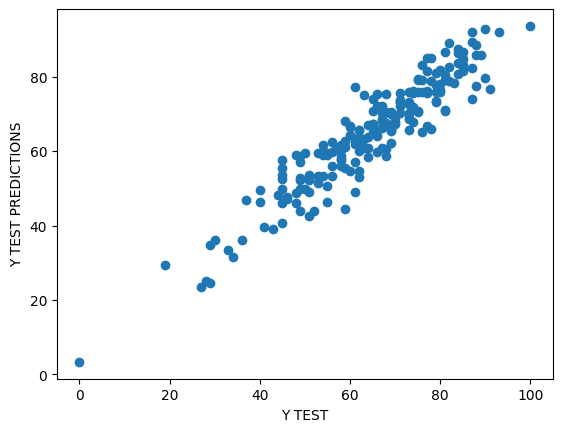

In [94]:
plt.scatter(x=y_test,y=y_test_pred)
plt.xlabel('Y TEST')
plt.ylabel('Y TEST PREDICTIONS')
plt.show()